<a href="https://colab.research.google.com/github/brunoodon/sprintIII_datascience/blob/main/MVP_SprintIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alertas de Vulnerabilidades Recentemente Exploradas**

Praticamente todos os dias, novas vulnerabilidades em aplicações são descobertas e atualizadas por pesquisadores e exploradas por atacantes. É essencial ter uma visão ampla da situação de ativos da organização em relação a essas vulnerabilidades e, tendo isso em vista, quanto maior for a quantidade de ativos e a diversidade de aplicações, mais se faz necessária a adoção de um arcabouço robusto de Big Data.











## Objetivo

Ter, de forma automatizada , alertas de hosts e aplicações vulneráveis, afim de que as mesmas sejam resolvidas ou mitigadas antes que virem ataques cibernéticos.

Premissas:


*   Um inventário atualizado de hosts e aplicações;
*   O Catálogo de Vulnerabilidades Exploradas (Known Exploited Vulnerabilities - [KEV](https://https://www.cisa.gov/known-exploited-vulnerabilities-catalog)), mantido pelo CISA;
*   Um repositório onde o inventário e o catpalogo KEV possam ser armazenados;
*   Uma Data Warehouse, para onde esses alertas de vulnerabilidades possam ser carregados;
*   Um fluxo de ETL para coleta no repositório, tranformação e carga desses dados correlacionados no Data Warehouse;
*   Uma plataforma de BI, onde seja possível a criação de gráficos e dashboards para ter uma visão mais analítica desses alertas.

Para este MVP foram utilizadas as soluções:

*   GenMyModel - para a modelagem de dados;
*   Azure Blob Storage - para armazenamento dos datasets de origem;
*   Azure Data Facroty - para criação do pipeline e dataflow, do processo de ETL;
*   Elastic Stack - fará o papel de Data Warehouse, para armazenamento persistente dos dados e ferramenta de Analytics.







## Coleta

Esta fase será executada da seguinte forma:

*   Será feito o upload manual do dataset **assets.csv** para o Azure Blob Storage;
*   Será criado um pipeline para realizar a cópia da versão mais atual do Catálogo de Vulnerabilidades Exploradas Conhecidas (Known Exploited Vulnerabilities - KEV, mantido pelo CISA e atualizado diariamente), para o Azure Blob Storage
![image.png](.WmZOaR+/X/adEDnz+CZZG2I4LXNniuto7U3Py5wU4/q1f75XZs7OydyP9srd2icPbpW1q/VmlF6jszJ95/3FI5QruT8m7bmQQwRyB72+BW3f9vKu1wJZ73ju37wmvMBDX2gR/eHI/KjpxTm1epPsU4Vsd/YOlLWUx9XzUOefd89HTcut6+JnpcIf5Wv35l3kLAQgAAEIQAACHQSGFMhqyf5uuyXWOYGsz9GGT+ff9TKPbTK2LcnGFgfKGcTi2L0g6YB7YdI8Y4/imeItsr+a0J2R3S0zyFq/1W3vVomOX/2GXLr6crn7R+ZpfuvLFOOgL8h+W02XLxLV2/RZhdQlQXS3FJ+Y00XsW8Xafr7APOuqvy64PxZj0CvC6oDSA9/nEqciH6K0+ey0j3XnW0xeX4enZd+mVTL1+aeTF+fNyt5rV8na8mV06lbwc90tMi0zsnNDOaF1qnZ47tktsnb1ernxqRmZc7P3K7k/1nQWvodA7mDYt6Dt217edS+Q9W7o03Kjvkxiz4zMuJd02Q9E9KPmn7VI/ximx+L+eJdp9dKuconXxl15FzkLAQhAAAIQgEAHAfc31udKBv71wHsIgWwCuuvvutZ54nnZufl6ueL3Lq9evpR7vtnGE1mRqnbc2MLyto09pm9bI1NX7ZJ6/Vk8prHybXX59C7xNvvs/XLj9ZfLFZeVy6LLF5g266/ht5bRN4lHPtfCvS49oXuhP15VrVTMRdnGrRLIC+2Ps3uLZ+9NaKsTrs/pYasP3uH57HSMdRsC+fxpOfLoLXLDpy+XK8ql1MXb5guRfbV7/LFwobjeG+Noe7Gue7zx49feLUfCDZw5OWKPNn5sg9xYPsYQfhNWan/07bnAfQRyB8C+BW3f9vKux39MNI++eVGXbdy63b3FuvUubnnnNv3DmR57gVzuf/bRC/jGwjwMzkIAAhCAAATGkMBR2fl7zZmmYzsul6kwq1SEtGgCee55uVFXhu04LLP6eujGGKBG6kWpnk2PI7Eyz9hj5iFdMu1nJBcwgxxEUnP5bzHzps8dz4Y3X3t/i30/g13E2VkmvEk7LhNmkH/v/hrSpO6d2Sc3rF4ln9g+ncyIzs+t0acafczdJOrqj+WKxkh0uhtJXW0XNcs8dmSIse7MAxtk6pItsu/N02F2t75OyzH65uYMsv53Zpd+vXtZ/pwKZX3m+za7RVQ8F108BrlR9s6KtM4gr4T+GDXowg4QyB38+ha0fdvLu94UyNVS6/Ayi/K/eWp5DugTt5U/cukPVXocCeQ5md5+iUyt/4Ls1j84+kzFwbtl74t5DzkLAQhAAAIQgEA3gTDIXr1Grrxtb/Fm4Ae+EJ7H9c+21gNvESnFypU7DsuZcolwlJ7+HU+P/d/1cjbtmgeOyplTs3Lkvo3hZV0LnUFuewa5Gnv86O4Q45Xbn5eZUO/18lH9r4PKpadezCq9zuO5ablV363yh7fIgfA88bTc8ch0KSDK/xpKn0sOz6uWY6MTe4vnhz+/K7yfZfbYXtFnkAvR0VIm+8znyvlvoHR1or7I7RPX3y17n43fYt3JLe1/6fHA/fG07Pv8Gpm6ZFMxBtUXVF1WP4Pc6UN0CXbb0bH0oGPdsBLhkq2y373jx/6/cvVHl0Z/cc9hmT01K8ceLZ5BDn15nf73WDNhHK19b/dTOjc9LXd/6eni+ePZ5+XW3ysE8uyj3wjPXM/NzcnMI9eHZ65VIMsK749Rky7gAIHcAa9vQdu3vbzrOYFcXzDR/4OcvKkxevN0+kOVHvsfLnXk/Izsrd4UqW/T2xJeOpD3kbMQgAAEIAABCHQS0DfmRm9bvrzxduRIAOsA/uv2P1Pos4vlm5437pKwBDT9O54eR3/X/fLNq+TuR+9u/S+kOkWqBpgsd5WusYeIe/v1xXLDA08XL/0aRSBr3VpX9XbpDXLDozMiZw/L3eW5j376btkbXkJaCmRddfejXeX/3lG84VrfyD1QGXvjty533XM0O6Pa2d5jnDh74O76jeer18jHL7te7n51rptb2v/S42H6o2/TDVtl/6PuuXeflmnvCLvPm9rRjIOOdd2SaP0fX3Z/aVV4H1CxFHtOju2xt1WvkY/rC+H03T/hDdnuzdfrS4YyI7uvXy/hrer6dus/vz8ssT7z7C3Rm9i3PVU/mBD68Aruj1GbjniAQO4A17eg7dteh+skQQACEIAABCAAAQiMREBvTnxBrrzsFpmuXhg2kiEKQQACY0gAgdzRaH0L2r7tdbhOEgQgAAEIQAACEIDAyAR0RV7+v7Ya2SQFIQCBsSCAQO5opr4Fbd/2OlwnCQIQgAAEIAABCEBgFAIv7pIb/nyDXLFpr+h/k8kHAhBYWQQQyB3t3beg7dteh+skQQACEIAABCAAAQhAAAIQgMCQBBDIHcA+c92fyuvHjnXkGDxJ7ag9PhCAAAQgAAEIQAACEIAABCCwPAkgkDva5Zln9gdRqzO/C/2qOFZ7fCAAAQhAAAIQgAAEIAABCEBgeRJAIC/PdsErCEAAAhCAAAQgAAEIQAACEFhiAgjkJQZOdRCAAAQgAAEIQAACEIAABCCwPAkgkJdnu+AVBCAAAQhAAAIQgAAEIAABCCwxAQTyEgOnOghAAAIQgAAEIAABCEAAAhBYngQQyMuzXfAKAhCAAAQgAAEIQAACEIAABJaYAAJ5iYFTHQQgAAEIQAACEIAABCAAAQgsTwII5OXZLngFAQhAAAIQgAAEIAABCEAAAktMAIG8xMCpDgIQgAAEIAABCEAAAhCAAASWJwEE8vJsF7yCAAQgAAEIQAACEIAABCAAgSUmgEBeYuBUBwEIQAACEIAABCAAAQhAAALLkwACeXm2C15BAAIQgAAEIAABCEAAAhCAwBITmHiB/P6Z08IXBvQB+gB9gD5AH6AP0AfoA/QB+gB9gD4wXx+YeIG8xDccqA4CEIAABCAAAQhAAAIQgAAExpQAAnlMGw63IQABCEAAAhCAAAQgAAEIQKBfAgjkfnliDQIQgAAEIAABCEAAAhCAAATGlAACeUwbDrchAAEIQAACEIAABCAAAQhAoF8CCOR+eWINAhCAAAQgAAEIQAACEIAABMaUAAJ5TBsOtyEAAQhAAAIQgAAEIAABCECgXwII5H55Yg0CEIAABCAAAQhAAAIQgAAExpQAArmj4Z55Zr985ro/lav/6FML/qodtccHAhCAAAQgAAEIQAACEIAABJYnAQRyR7uoqH392LGOHIMnqR21t9ifY0ePyuWXXSaf/OTvN76//duXypPf/a786le/Wmw3sA8BCEAAAhCAAAQgAAEIQGDsCCCQO5pMZ477/PRtL+ebCuQ777gjlyS33XarXH31VYjkLB1OQgACEIAABCAAAQhAAAIrnQACuaMH9C1o+7aXc71LIKtwfvmll2Tbtv+BSM7B4xwEIAABCEAAAhCAwKIQ0DGqrnDU7aifm7/8ZdHvQj5a/zUbN8qpU6cWYiZbVn2bWr1qaB/37N4tN/zXTXLu3LmsXU3XL5+lIYBA7uDct6Dt217O9S6BfMtXbpbf/S+/E74XX/wb8sorr+RMcA4CEIAABCAAgQtMQAfDOtDW74ZPfjIazPs0Tc8NrHXwr+d1q1+1oXkv+a3/HAkUHTfouVyaIfC2fH4t8/3vf9+yha0JBE3zA/qucl1pkfHMgdaRxqTZvB+DCCq14zl7ZhqMKcrHAAAd4klEQVRLLlatp8v3NC3nZyaksTmlYk77mPHR7SCsL3SA2i5dAlnTTchrv/D9uMv3+ex2lZ0vbRg/Uls+njSN4zwBBHKeSzjbt6Dt217Odb0I2pZY+/x6oaV/1Hz6hdh/8fg5+Y1vvC5vv//LC1E9dUIAAhCAAASWBQEVZ/ffd1/li/7N9iJ4kMGy/o1XsWIixv7m69aEoIlAn+brMQfMlh6rX1pOP+nAW/0ygZTa7iq3f//TlU3vn9Wf25p9HfOo2FFf7ON5pfFbHr81W8ZF0/Sc3WDwedP9rrjUp82b/7J1VjC1NW7HylbjM/bGWvkv54/62yWQtQ/bNTHItWaxLmZ7D+OH+eO3/hr259nPE0Ag57mEs30L2r7t5VzXixOBnCPDOQhAAAIQgMB4EkgH9H4An4vIC5d00G4iRgfM6aDZlzO7uXM+TUWk2snl00G9CWYro1vvgz+v+4MKUyun+b1Azvnh41R/UgGn5+771rci0ZRys/p0m7Oh59O4fL2+/KTsD8Jax6R640H7yZHDhyvG1m7/8Pjj1QqGtK9oO9nstN248eytf+k5y6fM7ePL+5sf6fVk+XWbpqkN/fo09dnqszSt187p1vzwvllei137nOa1Onz86oet7NDYNa+VV1+8XR+bpmk+88VsWp1ql8/8BBDIHYz6FrR928u5rh1/sQTybc+elIs+dyh8V9/8WjXTqzO+eqxp/+HGV0VngvWjWz3W8z5/7vw//PD9yrbm17r08ycPH6/O27mQ4P7xfq2/58fy7x982Kj79VMfiKZpPfZRP6789owdsoUABCAAAQgsSwKp0OoaHGsAOhawmcu0rKZreR1Et6XZ4D61lcLRQbcO3nXr9y2f2jFhY+d0m8tr6TmfLC23VVvzCWTPw2I3W1af5vGzinpsAsVEjJVJbdj5NC61bUJFt3o8SZ9BBLIXb56xsjLhrHbs2Bhp//R9R0Wp5vPsTQhaGbVvS6M1r4pK3epHy+lXP96PcML9ozYtn57WY/3qx/qEpfv6LN2uOytredUPjUd9tVgtLc2r6b5PW73mh249G7Vpx35f7fqP1mes/Hn2mwQQyE0m1Zm+BW3f9ipH3Y5eRIshkFV03vTUu0F8anUqXPWr51PhqekqmnW5tIllczE9r4LVi1q/xFqFr9bR9dE8Vl7z3XPwPVExnKs7tafH+uUDAQhAAAIQWK4E0kF46mc6WNZ0PxDWdD8Q13Q9p9/Utg3E/SDa2/J124Bf7ehHy3qBaee8YNBzaTk9Z4JBRWTqq6Z3fVIxoXnVhrej+yYgvC3vs9/3eXTf/PNc0jy5uHwetW/izZ8f532N2S+xTjkpd+sfGqdn3NZumj+16xl5m5rXt7Pm8+m+nLad5fV++Dy6rza9z/44LWdtbv1C062/5+IzW21p5p/ms33zr6us55X6aOVzsfk09mMCCOSYR3TUt6Dt217kbHmgF8ZiCOS0LhW2Jl51mwrNNuGcilQVzCpwdati2gtkL57T+vVY69AZ4FSEt9VtM8aa3lY2Vw/nIAABCEAAAheCgA6Kc8LO++IHx3peB99aRrf68cLAynkRoek2y6nldIBvA/7UlpXXsUYq9nJ51Y73P1fObNpWywzzMiut18+2qR0TLhaXziSacLF6Um5dwkLLqF+paDFbg8SleU3kWLlx36ac01ly3880Vs84127GJ9eXjJW3qfnTNjEbml/bzPqAbi2v98Ps2tbb13PeXq6c5td69KPp1s80Bp0h9/WbD22xm3++TvPLzrWx8X5Y3H72Po3F7LLNE0Ag57mEs30L2r7t5VzXi3OxBLIKVltirVsTyCZI/dJo9U1Fry291rL6UYHsbei+LctOBbLP72eJg6HSvolrO2fbXN1eFHuBb2XYQgACEIAABJYLARsQz+dPOthOhZwee5FqosYG9d5+OvhObWleLwLSsqlQ1Rhs0N9WztuwfT/Yt3Nt2zT+XL4cS40tFS963CbOfSy+jmHjUjuT8klvMqRxaTv6eJWVrTLItZu1Uy7NbHubuTaxvpP2e9+XvR9m17bmQ+44V87q0/y+L6TXktnTbS4+H4vft3IWd65sWzukDNLYzDbbJgEEcpNJdaZvQdu3vcpRt6MX52II5HQ2NycwTSibGDa3VKzakmcVyOlss+XLCWRLS2ee9by3a/nSbZrH6ldxn/qZluUYAhCAAAQgcCEI+IF2Wr8OkNvecJ0bKKeCOB00e/s2CNdzbbZ0hkz9y338wN4P5HO2rLym6fOl9lHb6ey0peW2vp5cutozUabpPkafP82nPlmcWofOxik7b6MrLs3X9YZrX/e47s8Xf8raM861mxdwWtbf2Gl7Btnf0ND2sVlT3xetzdSmfrwfKfu0nPcpV05tWr/QdJtBTuv09bTF7v3z14Da1TjVF7Pr2bRd06m/3lfvD/tNAgjkJpPqTN+Ctm97laNuRy+GxRDIqUBVgWkzyK76cC4VwF44qwhedfNrjWXRaqNLIJtAf6dckm3iVn3ws8v6DLLWZx9ft9Wh+XVptopnPhCAAAQgAIHlRkAHvLnZTT1vYs3S/UA5HaBbXDbA1jImIDRNBY6WN1s2ANe0nK20bitnA/vUngmH+cppebPlBc98Akz9zIkNz8/Hq/m1Lh+nntOPxuuFtOYxn3RrsWheszFqXEWN4//vfO1jnCxSzzjXbsrct43vF7qvH29T86ogtT6c9h07r+2n5cyG98N8s23a771PuXJq0/pGWja9Hsy/ttjNP/XF92GNo+st1pqudaXlrD49n6szFOCfLAEEchZLcbJvQdu3vZzrenFeftll4e6r3n1q+176v11SXdA5O+k5E5q2PNoEcu68llXxacur06XXKm7Njm690NZ9y69C2/LZW7CtPhPIWpeVMVtddVt5X2caK8cQgAAEIACBcSTgB+sL9b9PW6P6ooN69cMG/6PaodxkElDx6kVlX1Euh77fVyxmRwX3YrAy+5O2RSB3tGjfgrZvex2ukwQBCEAAAhCAwAoioGJSZ5J0u9BPn7YW4osO6v2M4kJsUXbyCCyWQNbJJr/EedzJTVo8S9EeCOQOyn0L2r7tdbhOEgQgAAEIQAACEIAABCaWwGIJ5IkFRmADE0Agd6DqW9D2ba/DdZIgAAEIQAACEIAABCAAAQhAYEgCCOQOYH0L2r7tdbhOEgQgAAEIQAACEIAABCAAAQgMSQCB3AHsM9f9qbx+7FhHjsGT1I7a4wMBCEAAAhCAAAQgAAEIQAACy5MAArmjXZ55Zn8QtTrzu9CvimO1xwcCEIAABCAAAQhAAAIQgAAElicBBPLybBe8ggAEIAABCEAAAhCAAAQgAIElJoBAXmLgVAcBCEAAAhCAAAQgAAEIQAACy5MAAnl5tgteQQACEIAABCAAAQhAAAIQgMASE0AgLzFwqoMABCAAAQhAAAIQgAAEIACB5UkAgbw82wWvIAABCEAAAhCAAAQgAAEIQGCJCUy8QP7p7DvCFwb0AfoAfYA+QB+gD9AH6AP0AfoAfYA+MF8fmHiBvMQ3HKgOAhCAAAQgAAEIQAACEIAABMaUAAJ5TBsOtyEAAQhAAAIQgAAEIAABCECgXwII5H55Yg0CEIAABCAAAQhAAAIQgAAExpQAAnlMGw63IQABCEAAAhCAAAQgAAEIQKBfAgjkfnliDQIQgAAEIAABCEAAAhCAAATGlAACeUwbDrchAAEIQAACEIAABCAAAQhAoF8CCOR+eWINAhCAAAQgAAEIQAACEIAABMaUAAK5o+GeeWa/fOa6P5Wr/+hTC/6qHbXHBwIQgAAEIAABCEAAAhCAAASWJwEEcke7qKh9/dixjhyDJ6kdtbfYn2NHj8rll10mn/zk7ze+v/3bl8qT3/2u/OpXv1psN7APAQhAAAIQgAAEIAABCEBg7AggkDuaTGeO+/z0bS/nmwrkO++4I5ckt912q1x99VWI5CwdTkIAAhCAAAQgAAEIQAACK50AArmjB/QtaPu2l3O9SyCrcH75pZdk27b/gUjOweMcBCAAAQhAAAIQgMCiENAxqq5w1O2on5u//GXR70I+Wv81GzfKqVOnFmImW1Z9m1q9amgf9+zeLTf8101y7ty5rF1N1y+fpSGAQO7g3Leg7dtezvUugXzLV26W3/0vvxO+F1/8G/LKK6/kTGTPvf3+L+U3vvG6vHg8f+FmC03QyWHiV0arbn6tF1b/8MP35U8ePt47SfVR21PjWqqPxnHbsyez1XlmnrXur775NVEOuY8vl0vnHAQgAIFxJaCDYR1o63fDJz/ZGMx///vf70zXwb8OuHWrX7Whti75rf8cCRQdN+i5XJqx87Z8fi2jfviPCQRN8wP6rnJdad52bl/rSGPy8aofOT+9rZyNND3XBpon9d18yfmgfnSJIF/nOOyrmNN4jLFuFypelyJubbMugazpJuS1b/h+3OXffHa7ys6XNowfqS0fT5rGcZ4AAjnPJZztW9D2bS/nul4EbUusfX690NI/aj493feiJU1bCccLib9LGM7HbqUIZM+hi7XyWH/Pj+XfP/jQF2EfAhCAwEQRUHF1/333VTHp32wvrPTvtz+uMrodzaNixUSM/c3XrYk9E3E+LWfXbKl59UvL6ScdeKufJpBS213l9u9/urLp/XPhNHbNvo55VOyoL/bRNI3D/LTz6bbLhuW1PMbMzttW6928+S9bZ/4sX9oOdn6ctxqTxm7sLUbtB8v5o/52CWTtw3ZNaCyDxjNoXxiFzTB+5Oz7aziXzrmYAAI55hEd9S1o+7YXOVse6MWJQM6RWdi5LtE2n2UEckFoUA5drBHI8/U20iEAgUkk4Af0KkJ0AN8l/rxwSQftJmJ0wJwOmn0545g759NUiKqdXD4d1JtgtjK69T7487qvcQ0ibq2c5k8Fchqz5dWt+pMKnpwNK6P57/vWtyJB5W2kDK1cuh00X1puOR/n2tzHqZx0TKo3F7RNjxw+XHE05v/w+OPVCgbN7z/aTjY7reW1Ps/e+pees3xav318eX+Dw19Plte2aZra0K9+LE19tvosTeu1c7o1P7xvltdi136lea0OH7/WZSs7NHbNa+XVF2/Xx6Zpms98MZtWp9rlMz8BBHIHo74Fbd/2cq5rx18KgaxiR5e+qpjRZbN6rN+LPndI/sONr0bLi3UZrJ7TNP3aMls9f+W3Z6rZQBU/ZlNjs9lTzafLge85+F7DRo6BndN6rE71TT/qr1+y65foap6bnno3zFCmceREm8Wreb3f5u/rpz6obKV5fFnj4f2z/Bqz+W5x+W1OMGp+Pa92vW3P23zUuCw2rcvaKa0z56+VU2bqr9al55SFHts581dttPHN+aPnrA7dV/tmV7caoy+n9eixxeDbxPuV9k/zT2eldXba6jB2vl6NIa1Ty2sey2/22EIAAhDoi4AXHfp3Xmft9GuDYD9w1jotjwoKX9b80UGzlmlLs8F9asvK21YH3SZm/b6lqx0TNnZOt7m8lp7zydJy29zAX+M3cWECxMpa7Has25wNPW++qD0/4+htaB5rB93qcfrJCck0zzge5+IyZhqPcvLizXNU5iac1Y4dGz/tn77vqCj9/9u5m9xKkioMw9tiDsybbYCYshRWwZg5vQXGxZgWYsAKGr2X/kqfT0dmVdlht8O8KbnyL+LEiSfTUp6b10W7tk8hmD7Ez1ejaUtRyTq50Jel83gcqH+ImXYcZp8fFvpxX+V8j5fz/W2CjkUezIdcM9fEyTjZn/djxk0erNuGmNnv7UfS9Q/xY1WH3VwIWCAvUHJod0G7O17y7DW/RK9dIFMI9NdcU0BQsLD0+RQmOZcihH22KZApOFgo0H7150+f9ylGUgRR1LDPQvsv/Y0v/TpH+qaA6XN9nO0unmiXIqsLNXLoObLfMWcB1WOkL8dYpgc5E4sldmn7ODj+mXmxTwzW5Jg504288oFE55hx4pX95EGM5ND5pl3OMQZ90m9eJ9pd+c588vfujJHtxE+emVP+lvqq7Q8/mSQv+s0l84oXsf7y9/88ua7pk7aJx37fx2nnWgEFFNghMB/CecDtQmw+TDNmPwj3Q3ry4Rg/M3YexPshumOlP+s88BOHhb5dROZYFwyrfhxLwcC8UiRw/GuW1fy7X2L3nPo826sYPZ/enn17n3Yp0Po4Y6eA6eOnb3MPcH2ZN8u05lrm/uB8O67M037Gbae04Rix5/3S57sf1yBtO49uk5idM9vZn/3yO5B7i/O531fzS6yrc8mPdtlOfnd922vmmP6rufU5t58KWCA/9Xiyt7ug3R3vSbI/7fCL8ZoFMm8AUzRm/C6gONbFzjzHeQqLFFWsaUORwfaf/vrPJ/sUKh2P/rNASR5Zr873mLRjLOaSgjHHUiCx33G6+OrtHjNF0sw3c6Ttqi9j8kOOXfzRfuad8XpNfNrN9ombtuSV+XaOq5yS8+pc4q7OZSzW+MWE/cRMm/a9ymeOMY26H3kxRhb65sOCOXbaZN02Oca64/fxGKRNXLuN2woooMBLBXgonoXVqtjqooCHb/qwZunCIPl0e87nDSj9eMDPA/+Mlf48a8xCcNV25rrql5hZ0yf/0VWO3a0Zd37FerYn5iw4us2M0QUH7e6Kjo7DdgqZPs7YMe3jp2+nQMz90x/cMLe+z9hvx2nO+dit7qVYdUzaz+uaGLTHvHNL284jcbPu+BzreKt+tM+15XwXyLwh7/HZpv3V3JNfj5m8cuzKpvPIvPvt/ZxL4rpeC1ggr10eR3cXtLvjrVLnl/O1CuR8dTbFWMa/K0y6kEj7LkZSAHKM4rjXKTpWRQoFz8wj8VN45auyWXfxScz5FnpVRGWcLtS68MqYrNN25ttx6RvH5MU6fVn3Ep8+NrfTZhak0568VqY9t8RO37t8V/2mfb8xboeMk3m3Wcftbfow13kd8waZnNuU7YzfedFuLjGcxzMmsfqDobbMHFZ9PaaAAgo8VyAPxLN/P4TnHA/HtGfh4TgP2tnvIjtFTR7qE4P1fPiesWizGj99Z6FKTsnlql+Pn+1+2M+xq/Wq2JhtO495jv0ZIwXGLG6+pnDva5HY/YHFavxTj80PEuY8pgX3QL5lMM3pm3t+dS6xO+bquube4Rr2fd/3cueRuFknh9X+ql/Go33f48zh6rqv5tdz6e3kkXmv+l5dh2kw55bYrn8uYIH8c5PPR3YXtLvjfU60NvjlfK0CmUKEr0HPwpKCows7ipq8uZvnSLWLkbQlLsd7P4VMF0+Z6l1RMgvF9Ok1/fnpYov9jEnbjtOFWm8nZred+XbczI/1XGbxx/mV3+yXmPRPAZy+PZ8u6jrH1Xzox09ir/Kd/VKEkgdLm7DfDvP8VT5zjGnU/ZLzY/CLf2aOaTbj5nivu03mlmMrn+7rtgIKKPAtAv2gPfulwOVhl4W2eZu7elBOex6WWeZD8+PgT//kIZzdq1j9ldruy3Y/2PeD/CpW+nKOvy/N0vPJsbt1j5N2xCMOC+d5k5b59xzTfhUj51gTK4Ud+x3j7n/npi3j0v4jLnfXdTqx344r8y7gMOsC9+pvkPtDC6zz1rTvxeSS69B5zOsy+3VOq37EzL3F+bxBnmP2OFdz7/zyO00/4jJPcknctmH83s9YM9/ONW1crwUskNcuj6O7C9rd8Vap88vwmgUyBQlFQd7MkQOFCcVPFoqFFMi0py19WGaBkkKj//aYN8m930VQxmC8xMyxXpNTF799rosa2iQOMfstYceYhRptO35iMp+ZL22JlYV9fubCGIyffLK/ajv7JmaP0znFPTl3jnNuxCZOYiX2HHP2m/uM0R+mEOfK9yqfGbPnRD7db443880+eTC3mBCTccgtc2afv0HupcfiOG35QIL71UUBBRTYKcAD73x7yX4exFP0cawLhPmAnpzygE37FBCco8DhwTpj5QGcc6tYPW76sM6D/Yy3ynfVj/453vP5UgFGnlfFRuKxTh60Z6ye51UMjmfB4qpAvso9fVfj5dzp6y9dnzn3dry6bn1t2pZtlo5JWwrS3MPz3slx7gH6JUbnMa/BvO8ZIzmt+hEz99fsO38fkt/V3JMfOREz9zDzuPtfrDnPWLNfxuP4asxHB/9ZClggL1n+d3B3Qbs73ip1fjl/9913j0+T+fTp6ue3v/n151/oVZx5bBYqFAd87ZTigm2Kjiy0pRBjzUJhQZGcr7/Spxf6p3DjOOe7kJqFCW0Yb8bpmGmTMZPrLKJ6n5gUO4xN+85hzn/G7/xnvuwz/8RLYZbc+sOGtM34vFlv2znH7GPRcTje43COWHnD3Dmu5sY14WfGIa+Ms+pHHpkX3zjAhbFY7nyv8plj9JwYq/sxRo9PHozZfXKs50UfFsbKtacdxzte5v1oXPd1+ue4awUUUOCXEuiH9ZfmsDPWc3PhoZ488vD/3Dj2+5gCFK5dVO6a5Xu493fNJXEouF/DKvE/2toC+eaK7i5od8e7Sd1TzxCgmEpR+IzudlFAAQUUUOAXE6CY5E0S65cuO2O9JBce6vP27iVx7PsxBV6rQOZlU3/F+XS9jzaft7geFsg3yrsL2t3xblL/vzlFUZs3lllz7DnLey6QeVPKG8zMkfV8o/mcOdtHAQUUUEABBRQ4UeC1CuQTLcx5r4AF8o3n7oJ2d7yb1D31DIH3XCA/Yzp2UUABBRRQQAEFFFBAgW8UsEC+Adtd0O6Od5O6pxRQQAEFFFBAAQUUUEABBb5RwAL5BuyPf/j9j//49OmmxdefIg7xXBRQQAEFFFBAAQUUUEABBd6ngAXyzXX5/vu/PYpa3vy+9IfimHguCiiggAIKKKCAAgoooIAC71PAAvl9XhezUkABBRRQQAEFFFBAAQUUeGMBC+Q3Bnc4BRRQQAEFFFBAAQUUUECB9ylggfw+r4tZKaCAAgoooIACCiiggAIKvLGABfIbgzucAgoooIACCiiggAIKKKDA+xSwQH6f18WsFFBAAQUUUEABBRRQQAEF3ljgwxfI//7XDz/6o4H3gPeA94D3gPeA94D3gPeA94D3gPeA98CX7oEPXyC/8QcODqeAAgoooIACCiiggAIKKHCogAXyoRfOtBVQQAEFFFBAAQUUUEABBfYKWCDv9TSaAgoooIACCiiggAIKKKDAoQIWyIdeONNWQAEFFFBAAQUUUEABBRTYK2CBvNfTaAoooIACCiiggAIKKKCAAocKWCAfeuFMWwEFFFBAAQUUUEABBRRQYK+ABfJeT6MpoIACCiiggAIKKKCAAgocKmCBfOiFM20FFFBAAQUUUEABBRRQQIG9AhbIez2NpoACCiiggAIKKKCAAgoocKiABfKhF860FVBAAQUUUEABBRRQQAEF9gpYIO/1NJoCCiiggAIKKKCAAgoooMChAhbIh14401ZAAQUUUEABBRRQQAEFFNgrYIG819NoCiiggAIKKKCAAgoooIAChwpYIB964UxbAQUUUEABBRRQQAEFFFBgr4AF8l5PoymggAIKKKCAAgoooIACChwqYIF86IUzbQUUUEABBRRQQAEFFFBAgb0CFsh7PY2mgAIKKKCAAgoooIACCihwqIAF8qEXzrQVUEABBRRQQAEFFFBAAQX2Clgg7/U0mgIKKKCAAgoooIACCiigwKECFsiHXjjTVkABBRRQQAEFFFBAAQUU2CtggbzX02gKKKCAAgoooIACCiiggAKHClggH3rhTFsBBRRQQAEFFFBAAQUUUGCvgAXyXk+jKaCAAgoooIACCiiggAIKHCpggXzohTNtBRRQQAEFFFBAAQUUUECBvQIWyHs9jaaAAgoooIACCiiggAIKKHCogAXyoRfOtBVQQAEFFFBAAQUUUEABBfYKWCDv9TSaAgoooIACCiiggAIKKKDAoQIWyIdeONNWQAEFFFBAAQUUUEABBRTYK2CBvNfTaAoooIACCiiggAIKKKCAAocKWCAfeuFMWwEFFFBAAQUUUEABBRRQYK+ABfJeT6MpoIACCiiggAIKKKCAAgocKmCBfOiFM20FFFBAAQUUUEABBRRQQIG9AhbIez2NpoACCiiggAIKKKCAAgoocKiABfKhF860FVBAAQUUUEABBRRQQAEF9gpYIO/1NJoCCiiggAIKKKCAAgoooMChAhbIh14401ZAAQUUUEABBRRQQAEFFNgrYIG819NoCiiggAIKKKCAAgoooIAChwpYIB964UxbAQUUUEABBRRQQAEFFFBgr8B/AXvQiL3D+TF/AAAAAElFTkSuQmCC);
*   Os 2 datasets serão adicionados ao Data Factory e inseridos no Data Flow como fontes de dados


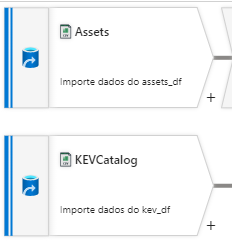
.

Visão do Dataset Assets:

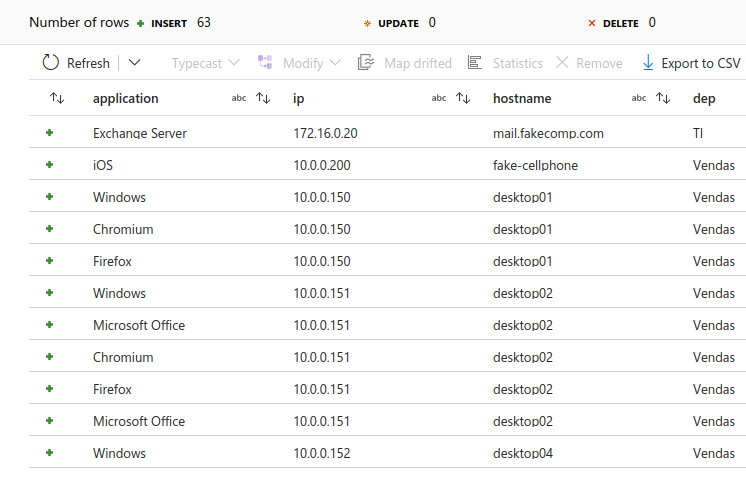










## Modelagem

O esquema escolhido foi o Flat, com 2 tabelas de origem (Assets e KEV Dataog). A terceira tablela (VulnerabilityAlerts) será criada pelo resultado do 'lookup' do campo 'application' da tabela de ativos com o campo 'product' da tabela de Vulnerabilidades Exploradas.

Todos os campos das tabelas de origem são VARCHAR e o campo cveID pode receber apenas 14 caracteres, limite de um CVE-ID.

Na tabela de destino (Vulnerability Alerts), os campos duaDate e dateAdded serão convertidos para tipo 'DATE'.


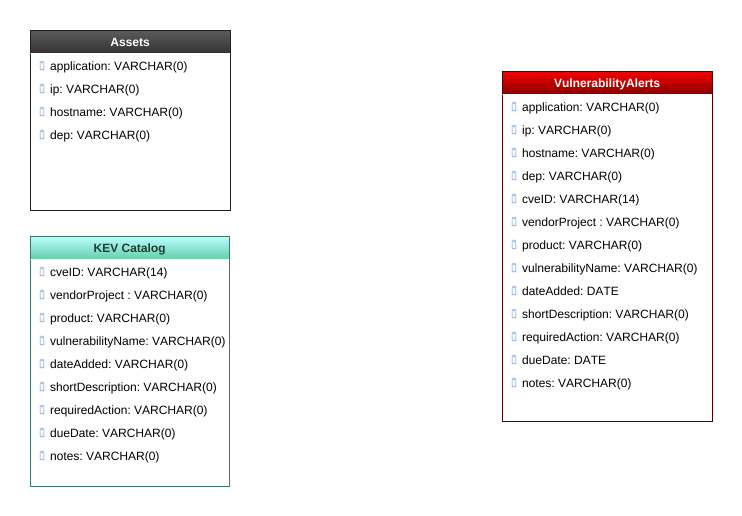

## Carga



## Análise